In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Titanic challenge

In [2]:
titanic = pd.read_csv('titanic_clean.csv')

In [3]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,who,embark_town,alive,alone
0,0,3,male,22.0,7.2500,S,man,Southampton,no,False
1,1,1,female,38.0,71.2833,C,woman,Cherbourg,yes,False
2,1,3,female,26.0,7.9250,S,woman,Southampton,yes,True
3,1,1,female,35.0,53.1000,S,woman,Southampton,yes,False
4,0,3,male,35.0,8.0500,S,man,Southampton,no,True


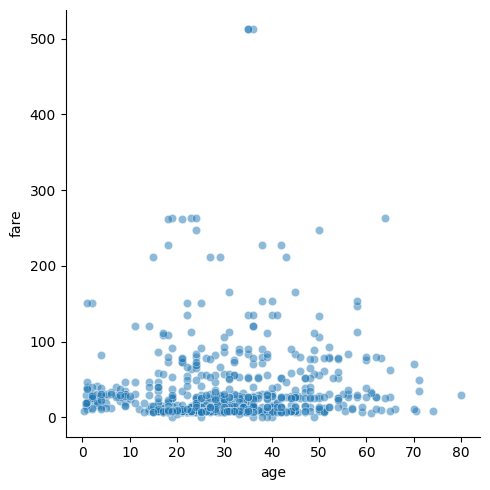

In [4]:
sns.relplot(
    data = titanic,
    x = 'age',
    y= 'fare',
    alpha = 0.5
)

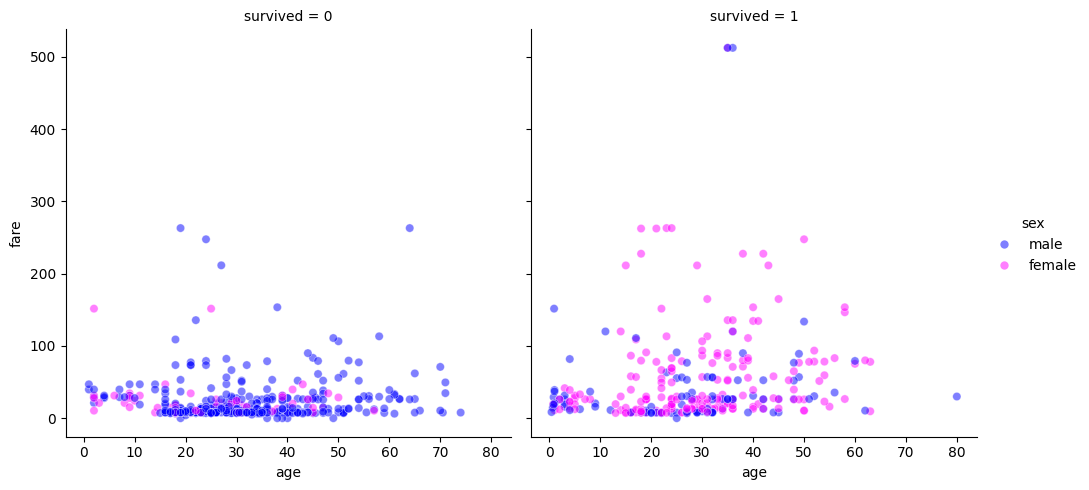

In [5]:

sns.relplot(
    data = titanic,
    x = 'age',
    y= 'fare',
    alpha = 0.5,
    hue = 'sex',
    col = 'survived',
    palette = {'male':'blue','female':'magenta'}
)



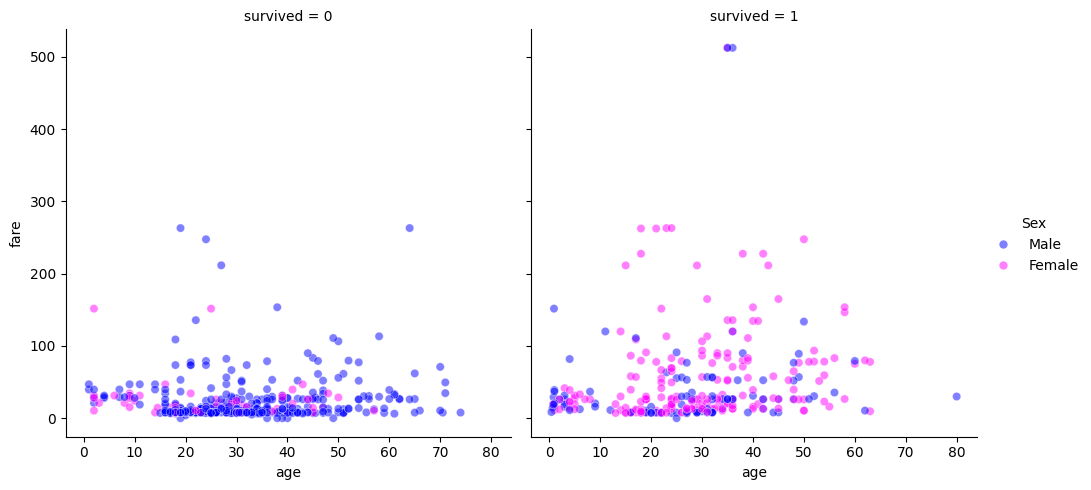

In [6]:
titanic['Sex'] =titanic['sex'].map({'male':'Male','female':'Female'})

sns.relplot(
    data = titanic,
    x = 'age',
    y= 'fare',
    alpha = 0.5,
    hue = 'Sex',
    col = 'survived',
    palette = {'Male':'blue','Female':'magenta'}
)


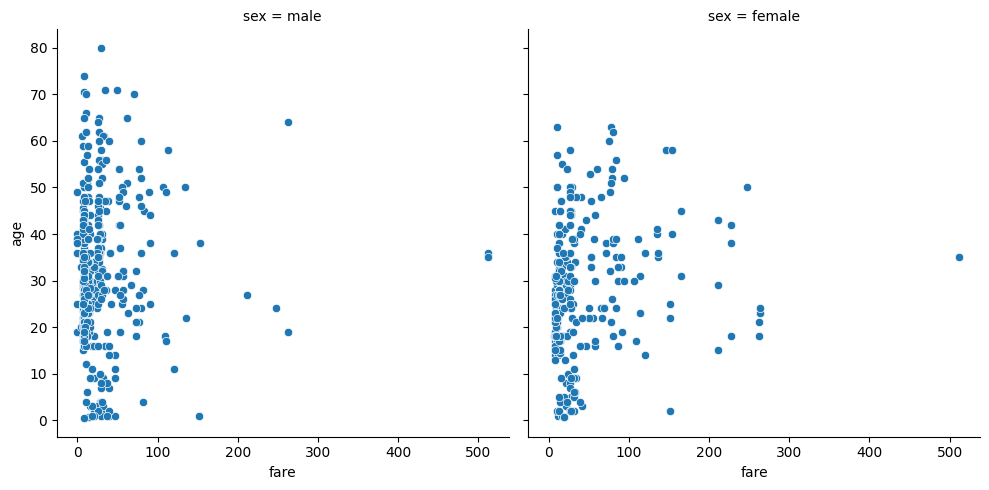

In [7]:
sns.relplot(
    data = titanic,
    x = 'fare',
    y= 'age',
    col = 'sex'
)

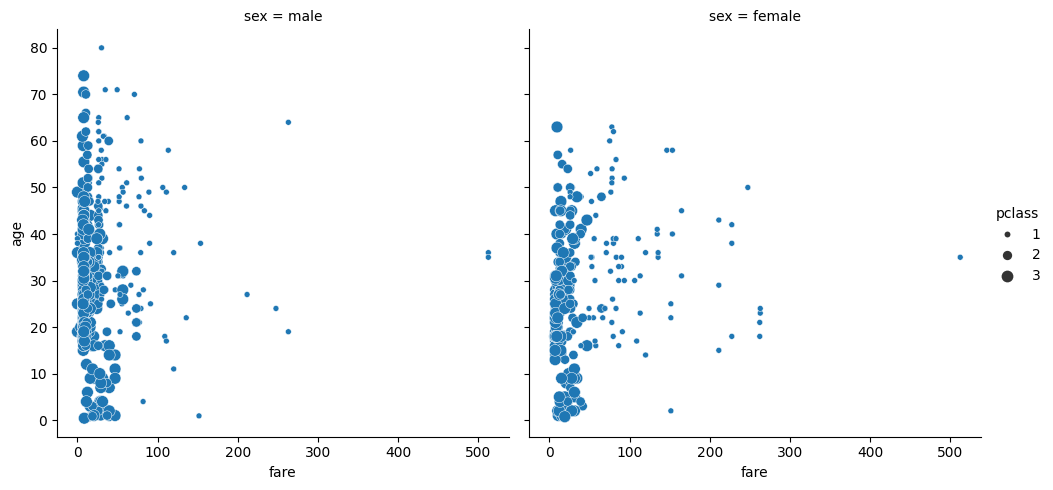

In [8]:
sns.relplot(
    data = titanic,
    x = 'fare',
    y= 'age',
    col = 'sex',
    size = 'pclass'
)

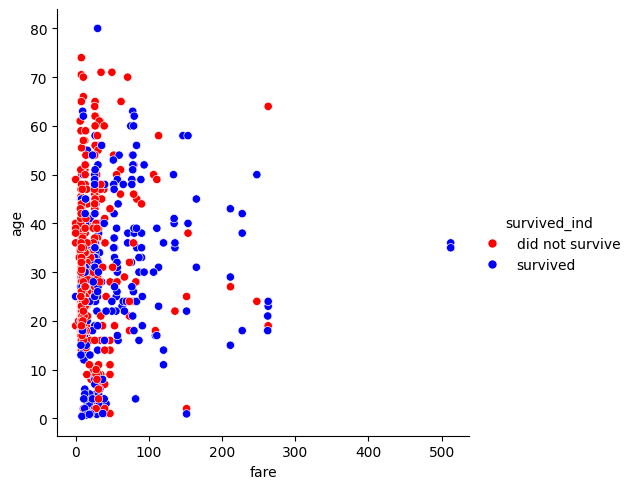

In [9]:
titanic['survived_ind'] =titanic['survived'].map({0:'did not survive',1:'survived'})

sns.relplot(
    data = titanic,
    x = 'fare',
    y= 'age',
    hue = 'survived_ind',
    palette = {'did not survive':'red','survived':'blue' }
)


# Student mental health challenge

In [10]:
df = pd.read_csv('Student Mental health.csv')

In [11]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [12]:
df.groupby('Choose your gender')[['Do you have Depression?','Do you have Anxiety?','Do you have Panic attack?']].count()

,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
Choose your gender,,,
Female,75,75,75
Male,26,26,26


In [13]:
columns_to_plot = df.columns[-4:-1]

category_order = ['Yes','No']

In [14]:
for column in columns_to_plot:
    counts = df[column].value_counts()

    counts = counts.reindex(category_order, fill_value=0)

    print(counts)
    print()

Do you have Depression?
Yes    35
No     66
Name: count, dtype: int64

Do you have Anxiety?
Yes    34
No     67
Name: count, dtype: int64

Do you have Panic attack?
Yes    33
No     68
Name: count, dtype: int64



<Axes: xlabel='Do you have Depression?', ylabel='percent'>

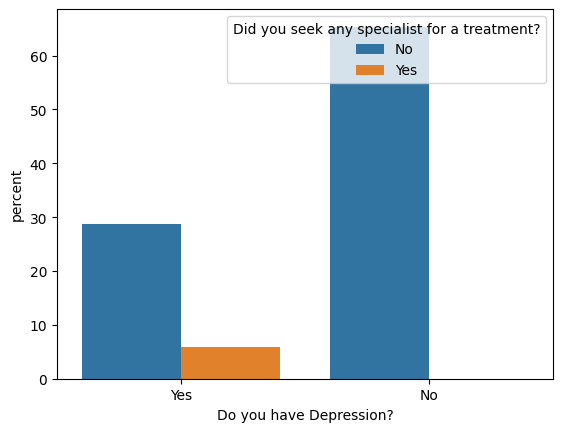

In [15]:
sns.countplot(df, x='Do you have Depression?', stat='percent',
             hue = 'Did you seek any specialist for a treatment?')

<Axes: xlabel='Do you have Anxiety?', ylabel='percent'>

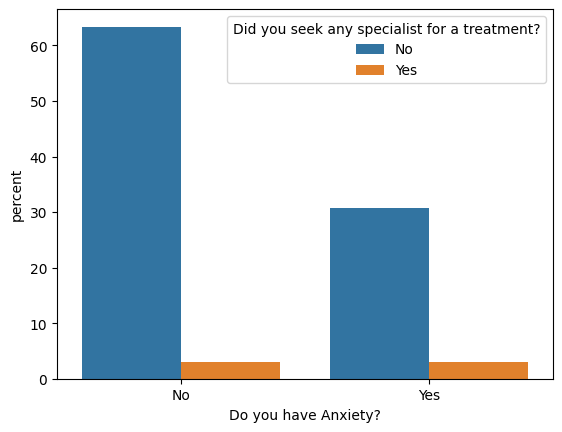

In [16]:
sns.countplot(df, x='Do you have Anxiety?', stat='percent',
             hue = 'Did you seek any specialist for a treatment?')

<Axes: xlabel='Do you have Panic attack?', ylabel='percent'>

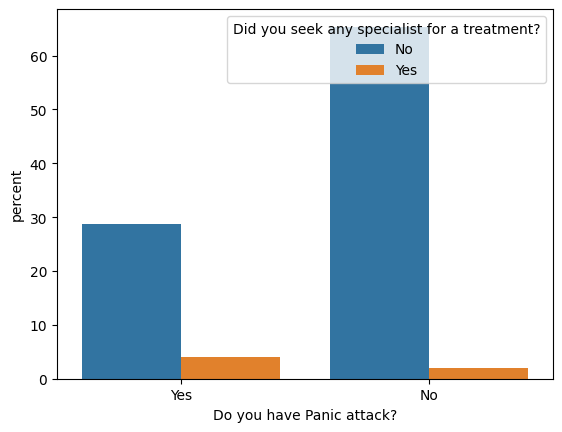

In [17]:
sns.countplot(df, x='Do you have Panic attack?', stat='percent',
             hue = 'Did you seek any specialist for a treatment?')

In [18]:
columns_to_plot

Index(['Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?'],
      dtype='object')

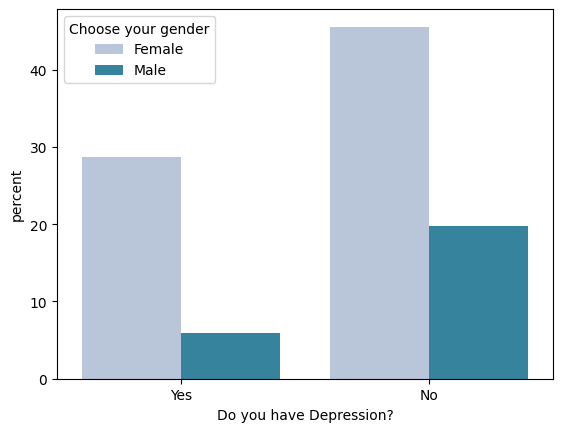

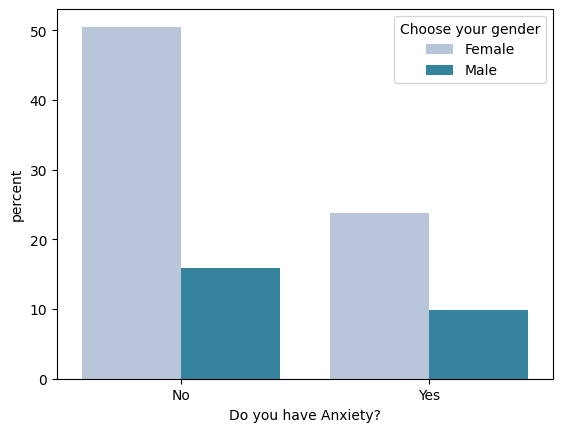

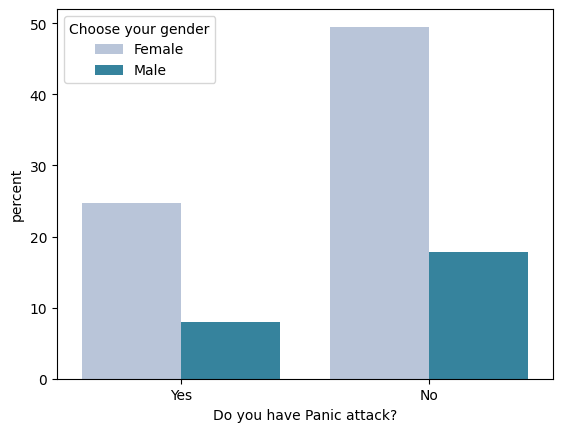

In [19]:
for column in columns_to_plot:
    sns.countplot(
        data = df,
        x = column,
        stat = 'percent',
        hue = 'Choose your gender',
        palette = 'PuBuGn'
    )
    plt.show()